In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog
import cmocean

In [13]:
from matplotlib import ticker, cm

In [2]:
plt.rcParams.update({'font.size': 22})
# # plt.rcParams.update({'font.size': 16})
# import matplotlib 
# font = {'family' : 'sans-serif',
#         'size'   : 22}

# matplotlib.rc('font', **font)

In [3]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X') 

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
ybound = 2e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01

<ipython-input-10-c50fcf72079c>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1,vmin=-1,cmap ='cmo.curl', rasterized=True)


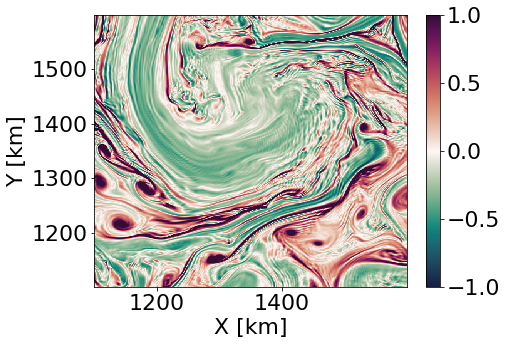

In [10]:
plt.figure(figsize=(7,5))
# plt.pcolormesh(vort05_0.XC.values/1000,vort05_0.YC.values/1000,(vort05_0/f).rename('').isel(time=10), vmax=1,cmap ='cmo.curl', rasterized=True)
test = (vort01_0/f).rename('').isel(time=10).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))
# plt.title('surface vorticity$/|f_0|$')
plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1,vmin=-1,cmap ='cmo.curl', rasterized=True)
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()

plt.savefig("fig3_vorFull.pdf", bbox_inches = "tight")

<ipython-input-11-1b367cccf551>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)


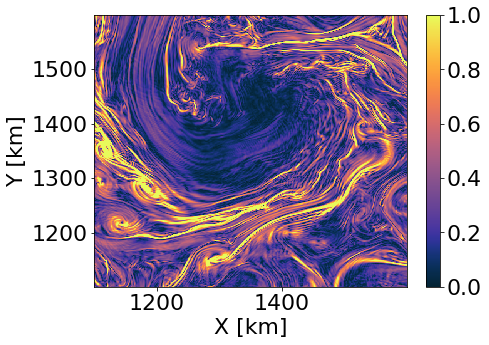

In [11]:
plt.figure(figsize=(7,5))
# plt.pcolormesh(vort05_0.XC.values/1000,vort05_0.YC.values/1000,(vort05_0/f).rename('').isel(time=10), vmax=1,cmap ='cmo.curl', rasterized=True)
test = (strain01_0/abs(f)).rename('').isel(time=10).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))
# plt.title('surface vorticity$/|f_0|$')
plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()

plt.savefig("fig3_strainFull.pdf", bbox_inches = "tight")

In [7]:
vort_01_sel = (vort01_0.isel(time=10).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))/f).rename('vort1_0')
strain_01_sel = (abs(strain01_0.isel(time=10).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))/f)).rename('strain1_0')

vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

In [10]:
hab01_sel = histogram(vort_01_sel,strain_01_sel,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab01_sel.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (vort1_0_bin: 239, strain1_0_bin: 239)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [11]:
girbNums01sel = len(vort_01_sel.YC)*len(strain_01_sel.XC)
test = (1/(binbox01*girbNums01sel)*(hab01_sel.rename('')).T)

<ipython-input-15-90893d0d720f>:9: UserWarning: The following kwargs were not used by contour: 'rasterized'
  im00 = ax.contourf(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_bin, tempJpdf01,


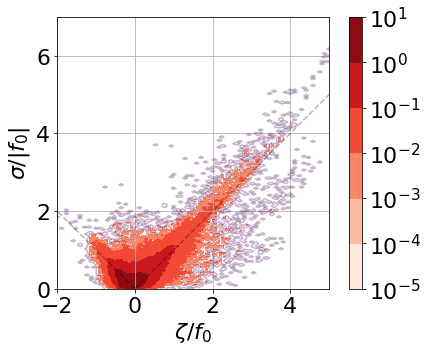

In [15]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

girbNums01sel = len(vort_01_sel.YC)*len(strain_01_sel.XC)
tempJpdf01 =  (1/(binbox01*girbNums01sel)*(hab01_sel.rename('')).T)
tempJpdf01 = xr.where(tempJpdf01<1e-3, np.NaN, tempJpdf01)
# im00 = ax.pcolormesh(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_bin, tempJpdf01, 
#              vmax=1e2, norm=cols.SymLogNorm(1e-2), cmap='Reds', rasterized=True)

im00 = ax.contourf(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_bin, tempJpdf01, 
             locator=ticker.LogLocator(), levels = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1],  cmap='Reds', rasterized=True)

ax.set_xlabel('$\zeta/f_0$')
ax.set_ylabel('$\sigma/|f_0|$')
ax.set_aspect('equal')
# ax[0,0].set_title('W, dx = 1km, Z = -50m')
h00 = fig.colorbar(im00, ax=ax)
# h00.set_label('m/day')
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(20**2/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(5**2/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01sel)*hab01_sel.T), levels=[1e-4],  alpha=.3)
ax.plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
# ax.plot(np.linspace(0,7),np.sqrt(2)*np.linspace(0,7),'k:',alpha=.5)

ax.set_xlim(-2,5)
ax.set_ylim(0, 7)

ax.grid()
plt.savefig("fig4-1.pdf", bbox_inches = "tight")

<ipython-input-20-a3d7eddab0fd>:7: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  vmax=1e2, norm=cols.SymLogNorm(1e-2), cmap='Reds', rasterized=True)
<ipython-input-20-a3d7eddab0fd>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im00 = ax.pcolormesh(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_bin, tempJpdf01,
<ipython-input-20-a3d7eddab0fd>:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im00 = ax.pcolormesh(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_

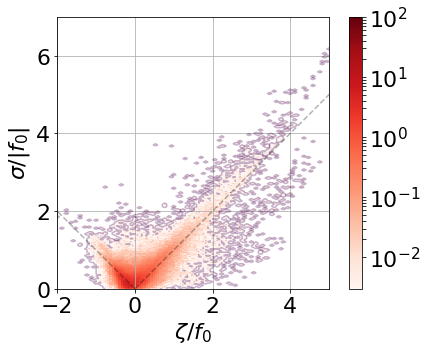

In [20]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

girbNums01sel = len(vort_01_sel.YC)*len(strain_01_sel.XC)
tempJpdf01 =  (1/(binbox01*girbNums01sel)*(hab01_sel.rename('')).T)
tempJpdf01 = xr.where(tempJpdf01<1e-3, np.NaN, tempJpdf01)
im00 = ax.pcolormesh(tempJpdf01.vort1_0_bin, tempJpdf01.strain1_0_bin, tempJpdf01, 
             vmax=1e2, norm=cols.SymLogNorm(1e-2), cmap='Reds', rasterized=True)

ax.set_xlabel('$\zeta/f_0$')
ax.set_ylabel('$\sigma/|f_0|$')
ax.set_aspect('equal')
# ax[0,0].set_title('W, dx = 1km, Z = -50m')
h00 = fig.colorbar(im00, ax=ax)
# h00.set_label('m/day')
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(20**2/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(5**2/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
# ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
ax.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01sel)*hab01_sel.T), levels=[1e-4],  alpha=.3)
ax.plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
# ax.plot(np.linspace(0,7),np.sqrt(2)*np.linspace(0,7),'k:',alpha=.5)

ax.set_xlim(-2,5)
ax.set_ylim(0, 7)

ax.grid()

plt.savefig("fig4-1.pdf", bbox_inches = "tight")

In [9]:
hist01 = xr.open_dataarray('hist01')

In [16]:

hist01TMean = hist01.mean(dim='time')

mask_vortDom = xr.where(abs(hist01TMean.vort1_0_bin)>abs(hist01TMean.strain1_0_bin),1,0)

mask_ac = xr.where(hist01TMean.vort1_0_bin<0,1,0)

mask_c = xr.where(hist01TMean.vort1_0_bin>0,1,0)

mask_strDom = xr.where(abs(hist01TMean.vort1_0_bin)<abs(hist01TMean.strain1_0_bin),1,0)


In [ ]:
### To get fullmaskV, fullmaskAC, fullmaskC we need to run the following cells three time, each time using only one definition of val and fullmask in cell 23 and cell 25, with cell 24 unchanged.
### The basic idea of this piece of code is that for surface vorticity and strain field at certain moment(t=timeindex), we first check on which grid points the vorticity fall on the range we want, 
### then we check for these grid points do their strain values also fall into the range we need, this time the range not only depend on the range we are looking at, but also on the vorticity value. 

In [23]:
val = ((1**2)/(binbox01*2000**2)*(hist01.rename('')).mean(dim='time').T)

# val = xr.where(val*mask_strDom<1e-5,0,1)  # use this for fullmaskV
# val = xr.where(val*mask_vortDom*mask_ac<1e-5,0,1) # use this for fullmaskAC
val = xr.where(val*mask_vortDom*mask_c<1e-5,0,1)  # use this for fullmaskC



In [24]:
strainXY = xr.DataArray(val.strain1_0_bin.values,coords=[val.strain1_0_bin.values], dims=['strain1_0_bin'])
valStrain = strainXY*val
valStrain2 = xr.where(valStrain==0,np.nan,valStrain)

strainMin = valStrain2.min(dim='strain1_0_bin')
strainMax = valStrain2.max(dim='strain1_0_bin')


timeindex = 10
vortInt = ((vort01_0.isel(time=timeindex)/f -val.vort1_0_bin[0])/(val.vort1_0_bin[1]-val.vort1_0_bin[0])).astype(int) - 1
vortInt2 = xr.where(vortInt>=239,238,vortInt)
strainOrigin = strain01_0.isel(time=timeindex)/abs(f)


fullmask = xr.zeros_like(vort01_0.isel(time=timeindex))
for i in range(238):
    if(np.isnan(strainMin[i])):
        continue
    tempmask = xr.where(vortInt2==i,1,0)*xr.where(strainOrigin>=strainMin[i],1,0)*xr.where(strainOrigin<=strainMax[i],1,0)
    fullmask = fullmask + tempmask
    fullmask.load()

In [25]:
# fullmaskV = fullmask
# fullmaskAC = fullmask
fullmaskC = fullmask

In [26]:
whV = fullmaskV*vort01_0.isel(time=timeindex)
whAC = fullmaskAC*vort01_0.isel(time=timeindex)
whC = fullmaskC*vort01_0.isel(time=timeindex)

<ipython-input-28-fb60266cf00c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)


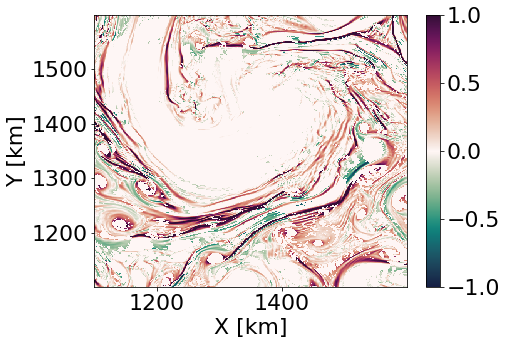

In [28]:
plt.figure(figsize=(7,5))
test = ((whV)/f).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))
plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)
# plt.title("surface vorticity$/|f_0|$, 'F'")
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()

plt.savefig("fig3_vorFront.pdf", bbox_inches = "tight")

<ipython-input-29-2783dc0ba04a>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)


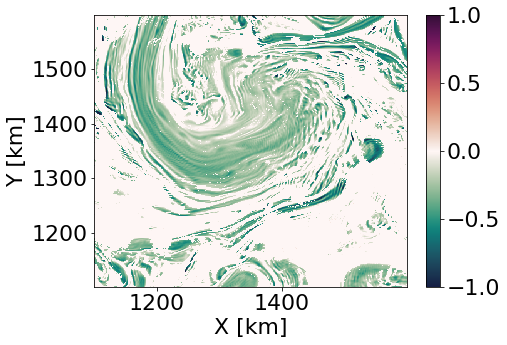

In [29]:
plt.figure(figsize=(7,5))
test = ((whAC)/f).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))
plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)
# plt.title("surface vorticity$/|f_0|$, 'F'")
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()

plt.savefig("fig3_vorAC.pdf", bbox_inches = "tight")

<ipython-input-30-c615a29e5008>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)


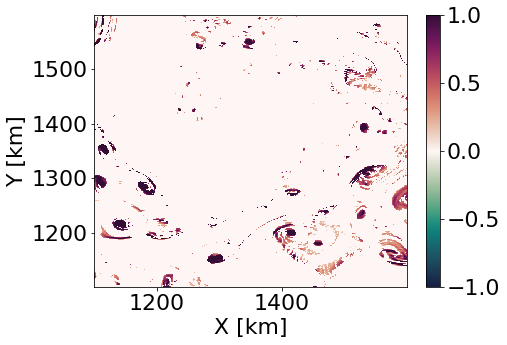

In [30]:
plt.figure(figsize=(7,5))
test = ((whC)/f).sel(XC = slice(11e5,16e5), YC = slice(11e5,16e5))
plt.pcolormesh(test.XC.values/1000,test.YC.values/1000,test, vmax=1, vmin=-1,cmap ='cmo.curl', rasterized=True)
# plt.title("surface vorticity$/|f_0|$, 'F'")
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()

plt.savefig("fig3_vorC.pdf", bbox_inches = "tight")